In [7]:
from google.colab import drive
import pandas as pd

# Mount Drive
drive.mount('/content/drive')

# Paths
train_path = "/content/drive/MyDrive/poker-hand-training-true.data"
test_path  = "/content/drive/MyDrive/poker-hand-testing.data"

# Column names
col_names = [
    "S1", "C1",
    "S2", "C2",
    "S3", "C3",
    "S4", "C4",
    "S5", "C5",
    "hand"
]

# Load the data
train_df = pd.read_csv(train_path, header=None, names=col_names)
test_df  = pd.read_csv(test_path,  header=None, names=col_names)

# Clean the test data in the same way
card_cols = ["S1", "C1",
             "S2", "C2",
             "S3", "C3",
             "S4", "C4",
             "S5", "C5"]

test_df[card_cols] = test_df[card_cols].replace("Nothing", 0)
test_df[card_cols] = test_df[card_cols].astype(int)

# Quick checks
train_df.head()
train_df["hand"].value_counts().sort_index()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,count
hand,
0,12493
1,10599
2,1206
3,513
4,93
5,54
6,36
7,6
8,5


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Train shape:", train_df.shape)
print("Test shape: ", test_df.shape)
print("\nTrain info:")
print(train_df.info())

train_df.head()


Train shape: (25010, 11)
Test shape:  (1000000, 11)

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB
None


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [9]:
# Map class numbers (0–9) to poker hand names
hand_names = {
    0: "Nothing",
    1: "One pair",
    2: "Two pairs",
    3: "Three of a kind",
    4: "Straight",
    5: "Flush",
    6: "Full house",
    7: "Four of a kind",
    8: "Straight flush",
    9: "Royal flush"
}

train_df["hand_name"] = train_df["hand"].map(hand_names)

class_counts = train_df["hand"].value_counts().sort_index()
class_props = train_df["hand"].value_counts(normalize=True).sort_index()
print("Counts:\n", class_counts)
print("\nProportions:\n", class_props)


Counts:
 hand
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: count, dtype: int64

Proportions:
 hand
0    0.499520
1    0.423790
2    0.048221
3    0.020512
4    0.003719
5    0.002159
6    0.001439
7    0.000240
8    0.000200
9    0.000200
Name: proportion, dtype: float64


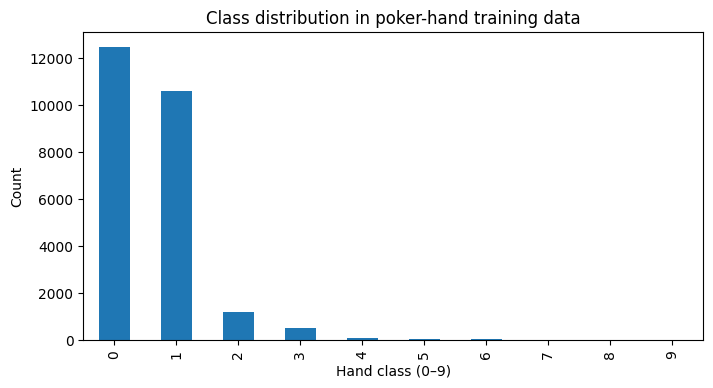

In [10]:
plt.figure(figsize=(8,4))
class_counts.plot(kind="bar")
plt.xlabel("Hand class (0–9)")
plt.ylabel("Count")
plt.title("Class distribution in poker-hand training data")
plt.show()

In [11]:
# Clean the training data so everything is numeric
card_cols = ["S1", "C1",
             "S2", "C2",
             "S3", "C3",
             "S4", "C4",
             "S5", "C5"]

train_df[card_cols] = train_df[card_cols].replace("Nothing", 0)
train_df[card_cols] = train_df[card_cols].astype(int)


In [12]:

# 10 numeric input features (card suits and ranks)
feature_cols = ["S1", "C1",
                "S2", "C2",
                "S3", "C3",
                "S4", "C4",
                "S5", "C5"]

X = train_df[feature_cols]

# y = target labels (0–9, type of poker hand)
y = train_df["hand"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_valid.shape[0])

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_valid_pred = log_reg.predict(X_valid)

print("Validation accuracy:", accuracy_score(y_valid, y_valid_pred))
print("\nClassification report:\n")
print(classification_report(y_valid, y_valid_pred))



Train size: 20008
Validation size: 5002
Validation accuracy: 0.4996001599360256

Classification report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2499
           1       0.00      0.00      0.00      2120
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.50      5002
   macro avg       0.05      0.10      0.07      5002
weighted avg       0.25      0.50      0.33      5002



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Make model
tree_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

# Fit the model on the training data
tree_clf.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_tree = tree_clf.predict(X_valid)

# Evaluate the model
print("Decision Tree - validation accuracy:",
      accuracy_score(y_valid, y_valid_pred_tree))
print("\nDecision Tree - classification report:\n")
print(classification_report(y_valid, y_valid_pred_tree))


Decision Tree - validation accuracy: 0.4884046381447421

Decision Tree - classification report:

              precision    recall  f1-score   support

           0       0.58      0.57      0.57      2499
           1       0.48      0.47      0.47      2120
           2       0.10      0.12      0.11       241
           3       0.06      0.08      0.07       102
           4       0.00      0.00      0.00        19
           5       0.06      0.09      0.07        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.49      5002
   macro avg       0.13      0.13      0.13      5002
weighted avg       0.50      0.49      0.49      5002



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Make model
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)

# Predict on validation set
y_valid_pred_rf = rf_clf.predict(X_valid)
print("Random Forest – validation accuracy:",
      accuracy_score(y_valid, y_valid_pred_rf))
print("\nRandom Forest – classification report:\n")
print(classification_report(y_valid, y_valid_pred_rf))


Random Forest – validation accuracy: 0.6115553778488605

Random Forest – classification report:

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      2499
           1       0.57      0.50      0.53      2120
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.61      5002
   macro avg       0.12      0.13      0.12      5002
weighted avg       0.56      0.61      0.58      5002



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test size: 1000000

Baseline (most common class) test accuracy: 0.501209

Logistic Regression - test accuracy: 0.501209
Decision Tree - test accuracy: 0.47818
Random Forest - test accuracy: 0.608472

Random Forest - detailed classification report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.63      0.80      0.71    501209
           1       0.57      0.49      0.52    422498
           2       0.41      0.00      0.01     47622
           3       0.52      0.00      0.00     21121
           4       0.33      0.00      0.00      3885
           5       0.83      0.00      0.00      1996
           6       0.50      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.61   1000000
   macro avg       0.38      0.13      0.13   1000000
weighted avg       0.59      0.61      0.58   1000000



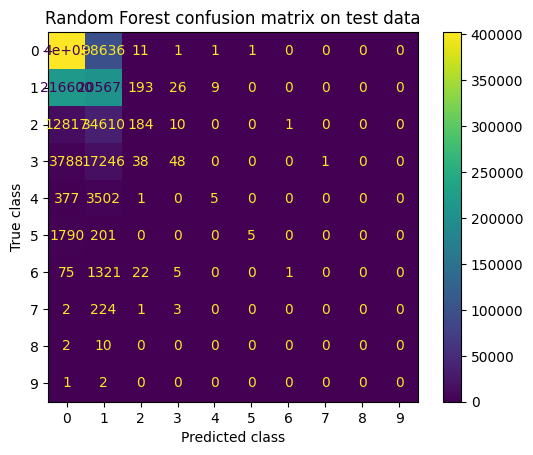

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Same 10 numeric inputs
feature_cols = ["S1", "C1",
                "S2", "C2",
                "S3", "C3",
                "S4", "C4",
                "S5", "C5"]

X_test = test_df[feature_cols]
y_test = test_df["hand"]

print("Test size:", X_test.shape[0])
most_common_class = y_train.value_counts().idxmax()
y_test_baseline = np.full_like(y_test, fill_value=most_common_class)

print("\nBaseline (most common class) test accuracy:",
      accuracy_score(y_test, y_test_baseline))

# Logistic Regression on test set:
y_test_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression - test accuracy:",
      accuracy_score(y_test, y_test_pred_log))

# Decision Tree on test set:
y_test_pred_tree = tree_clf.predict(X_test)
print("Decision Tree - test accuracy:",
      accuracy_score(y_test, y_test_pred_tree))

# Random Forest on test set:
y_test_pred_rf = rf_clf.predict(X_test)
print("Random Forest - test accuracy:",
      accuracy_score(y_test, y_test_pred_rf))
print("\nRandom Forest - detailed classification report:")
print(classification_report(y_test, y_test_pred_rf))

# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest confusion matrix on test data")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()


Test accuracies:

Baseline (most common class)  : 0.501
Logistic Regression           : 0.501
Decision Tree                 : 0.478
Random Forest                 : 0.608


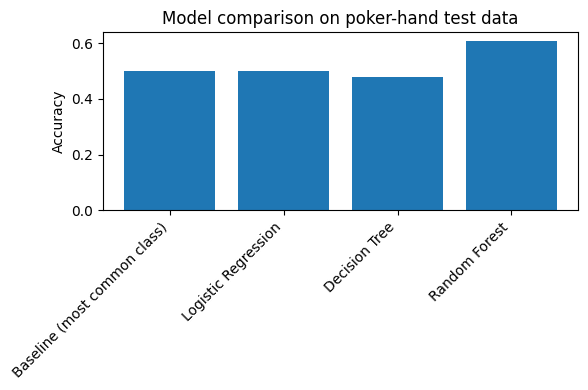

In [16]:
# Baseline on the test set, predicting most common class in training data
majority_class = y_train.value_counts().idxmax()
baseline_pred_test = pd.Series(majority_class, index=y_test.index)
baseline_acc = accuracy_score(y_test, baseline_pred_test)

# Accuracies for each model on the test set
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
tree_acc = accuracy_score(y_test, tree_clf.predict(X_test))
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

model_names = [
    "Baseline (most common class)",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
]

accuracies = [
    baseline_acc,
    log_reg_acc,
    tree_acc,
    rf_acc,
]

print("Test accuracies:\n")
for name, acc in zip(model_names, accuracies):
    print(f"{name:30s}: {acc:.3f}")

plt.figure(figsize=(6,4))
plt.bar(model_names, accuracies)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model comparison on poker-hand test data")
plt.tight_layout()
plt.show()
